# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

### Load Data

In [1]:
import pandas as pd
df_diabetes=pd.read_csv('/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Supervised_MLProject/data/diabetes.csv')

In [2]:
df_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [3]:
df_diabetes.info()
df_diabetes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

#### Research: "most likely" trend
- gestational diabetes: women don't have diabetes before but have diabetes during pregnancies
- High blood glucose onserved with diabetes
- High blood pressure observed with diabetes
- High skin thickness  observed  with diabetes
- Low insulin observed with  diabetes
- High BMI observed with diabetes
- DiabetesPedigreeFunction --> likeness of diabetes from family-->
- Age
- Outcome: 0= none and 1= positive

In [4]:
df_diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

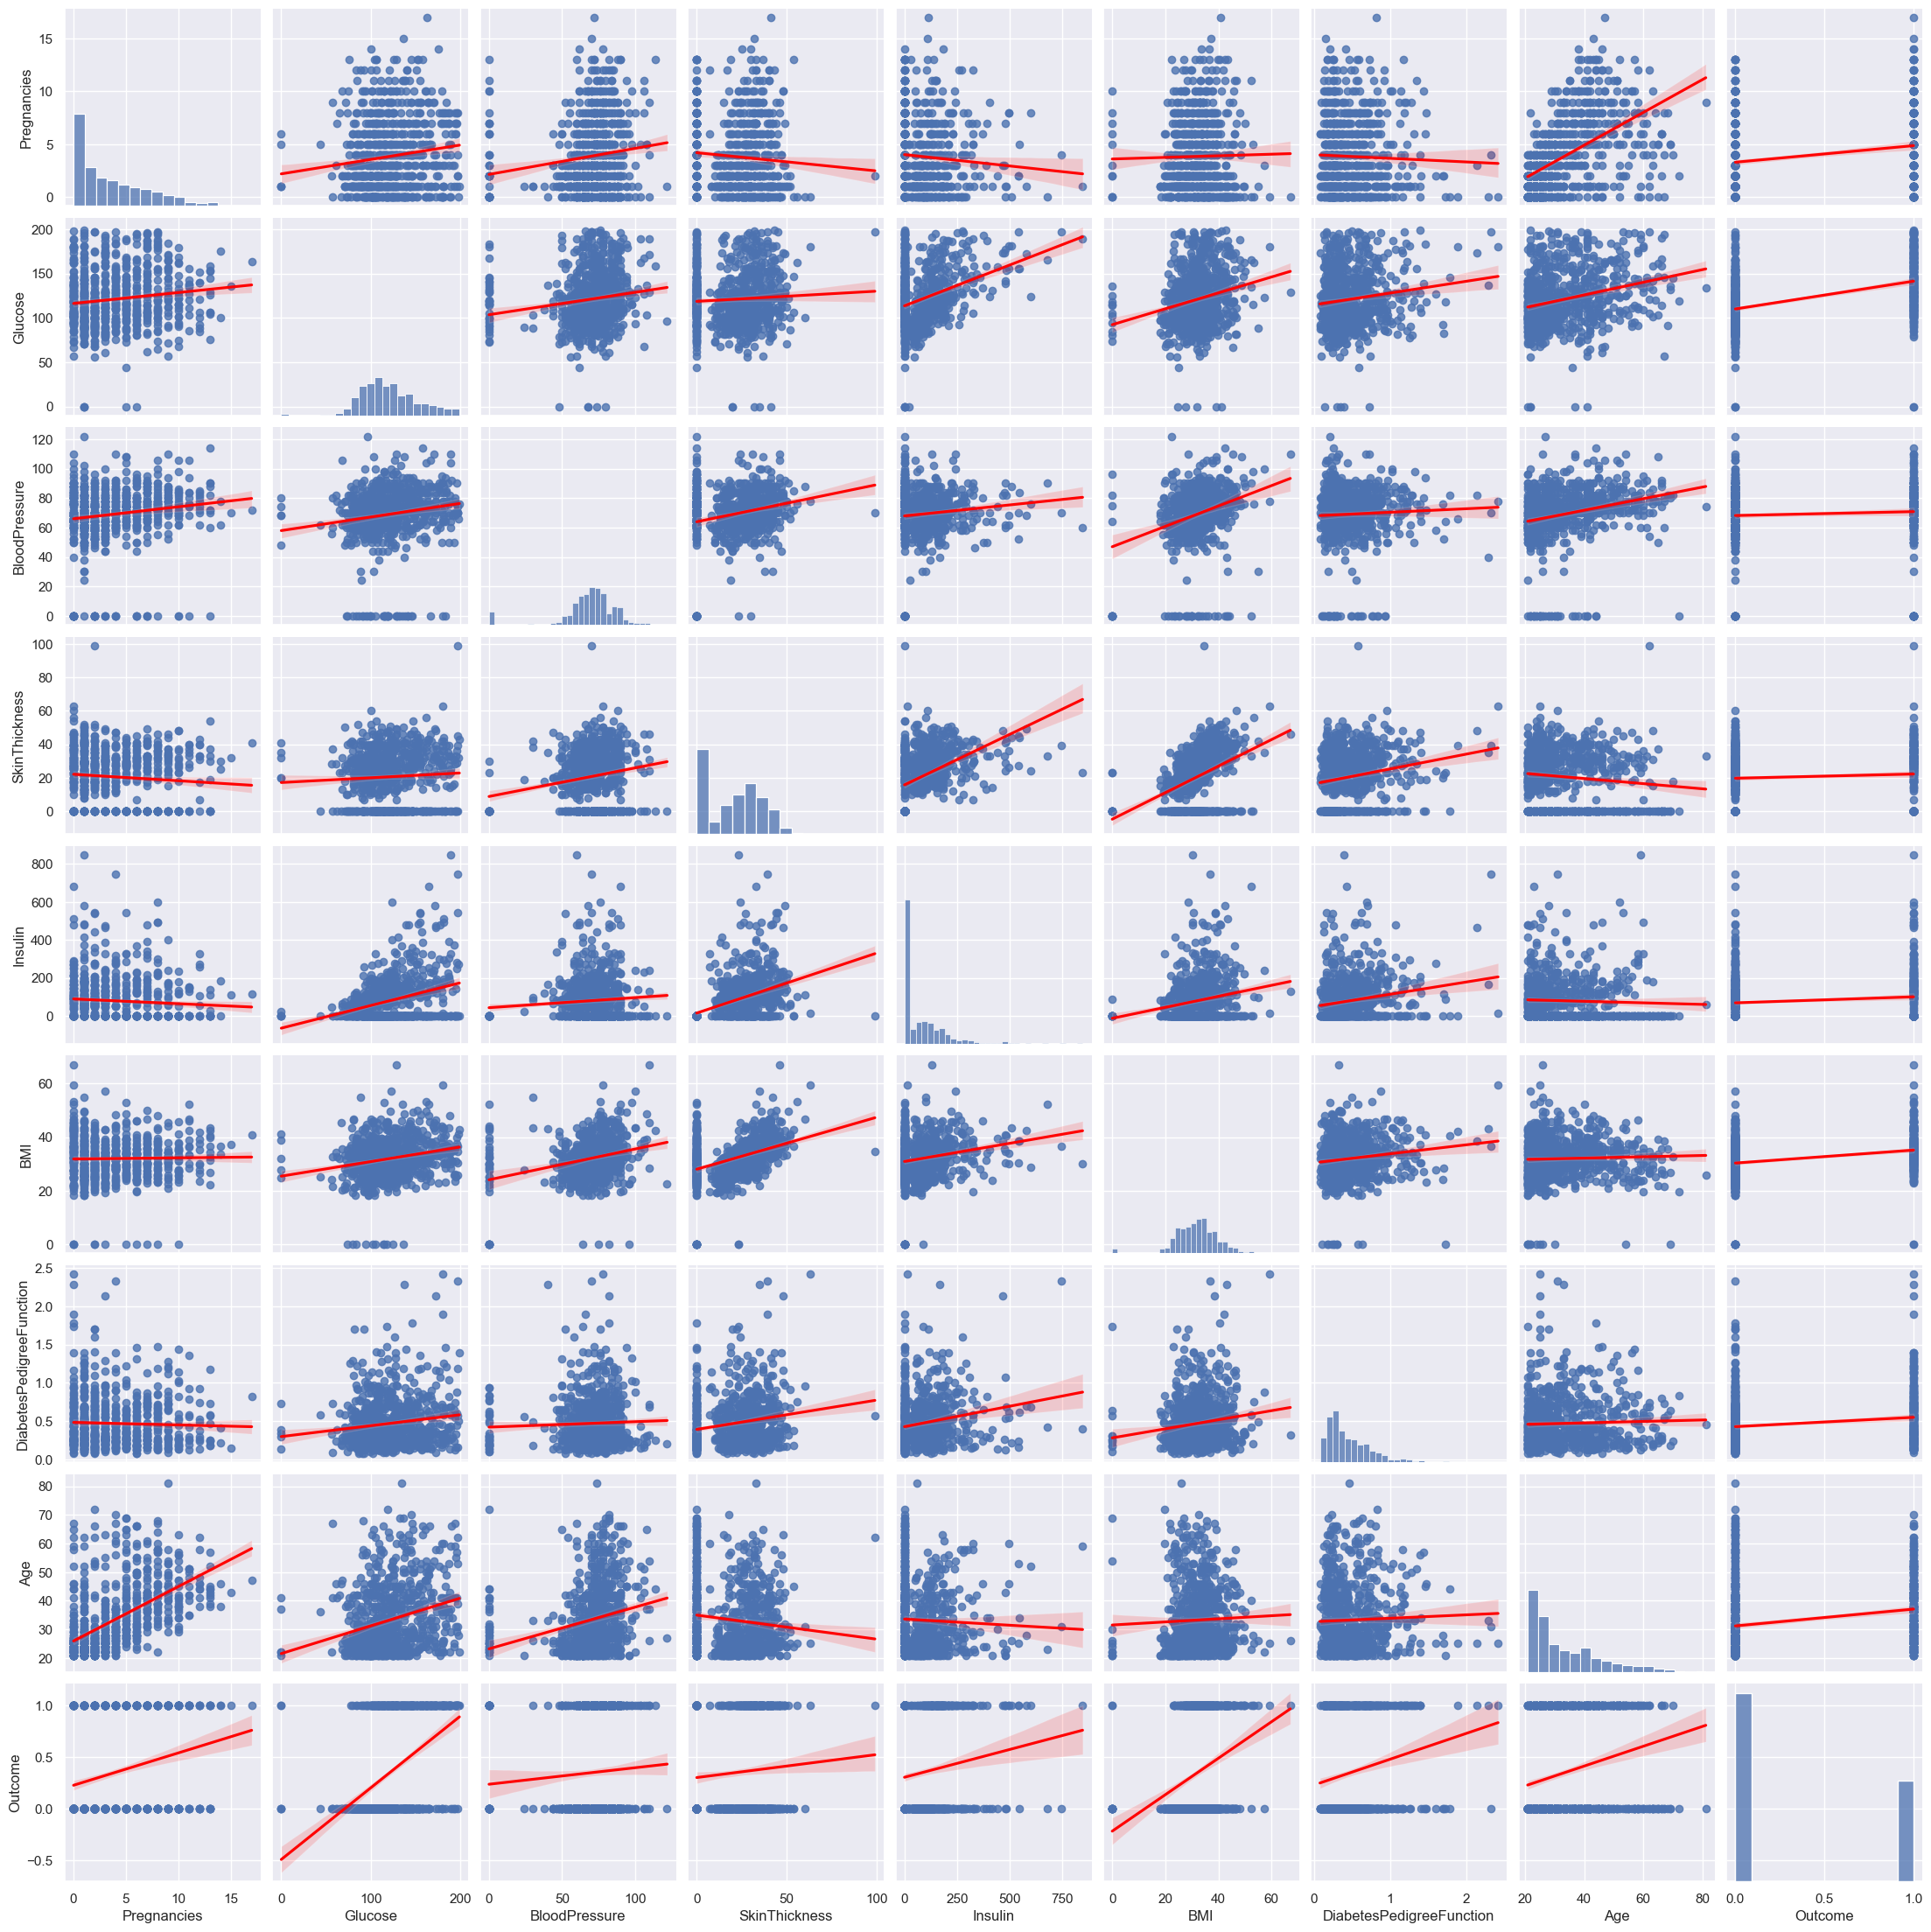

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='deep')
sns.pairplot(data=df_diabetes,
            kind='reg',
            diag_kind='hist',
            plot_kws={'line_kws':{'color':'red'}},
            )

plt.show()

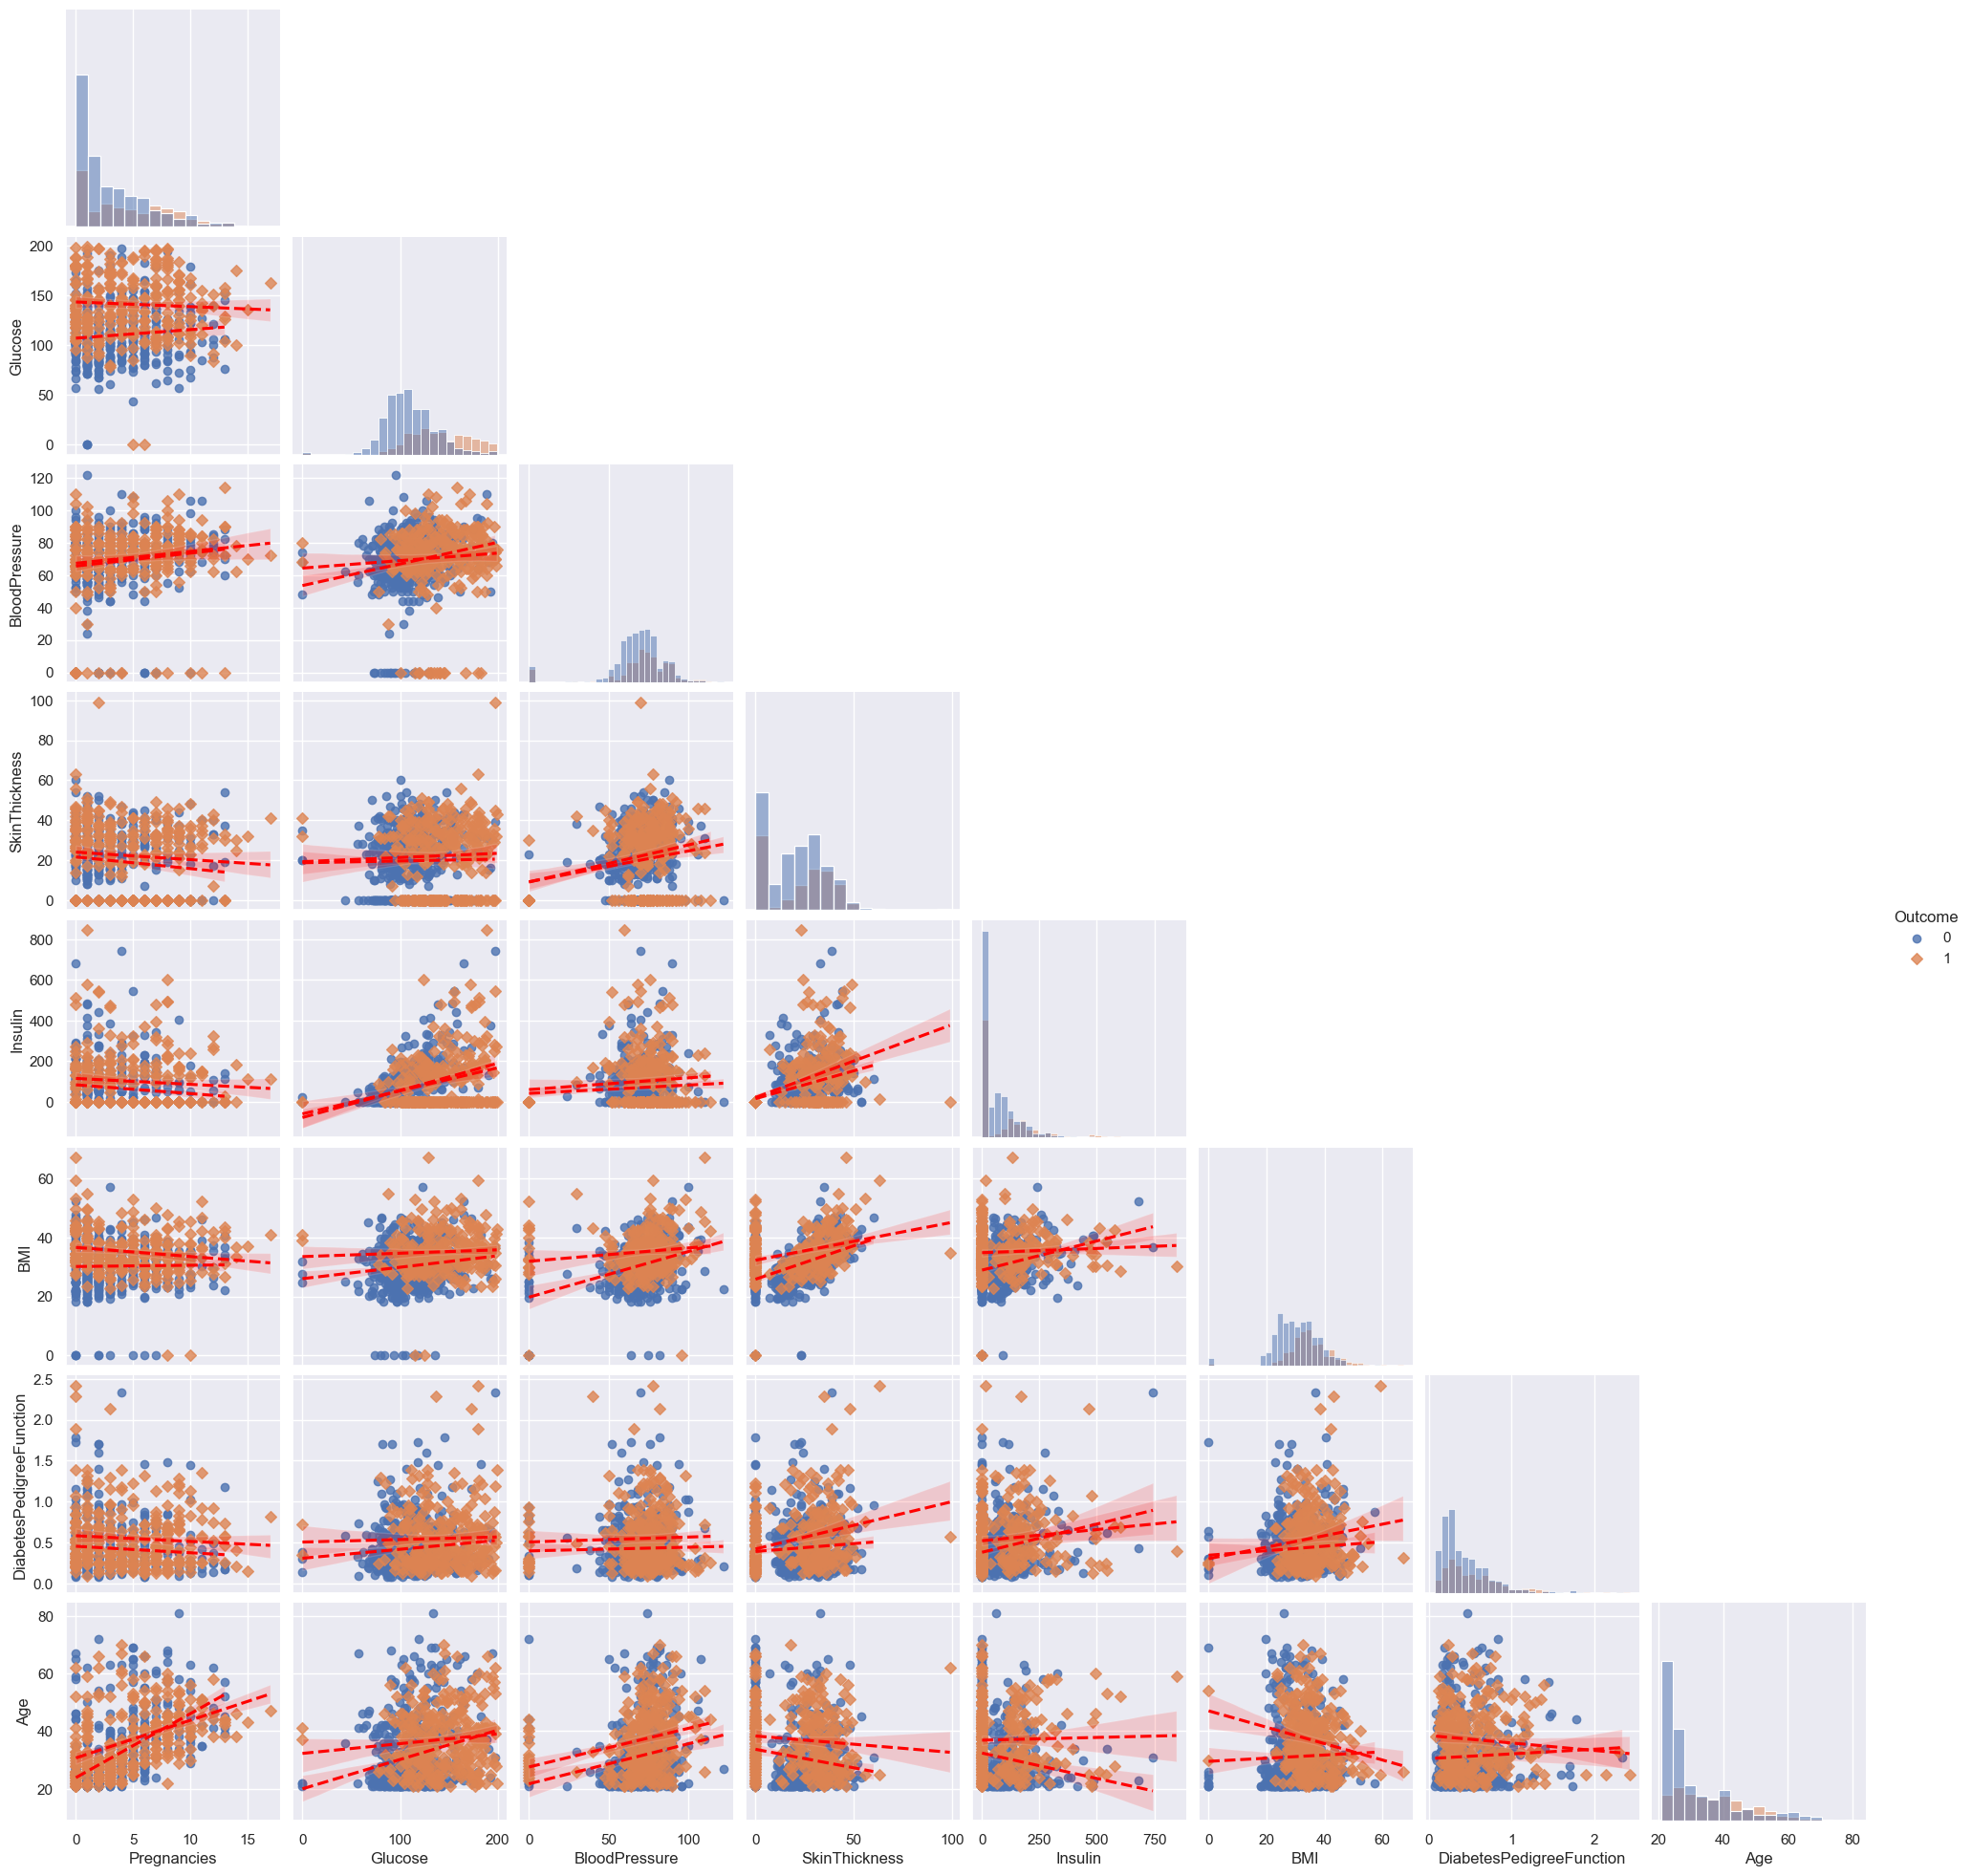

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.pairplot(data=df_diabetes,
            hue="Outcome",
            markers=["o", "D"],
            kind='reg',
            diag_kind='hist',
            plot_kws={'line_kws':{'color':'red', 'linestyle':'--'}},
            corner=True)
plt.show()

In [7]:
# correllation of df_diabetes
corr= df_diabetes.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<AxesSubplot:>

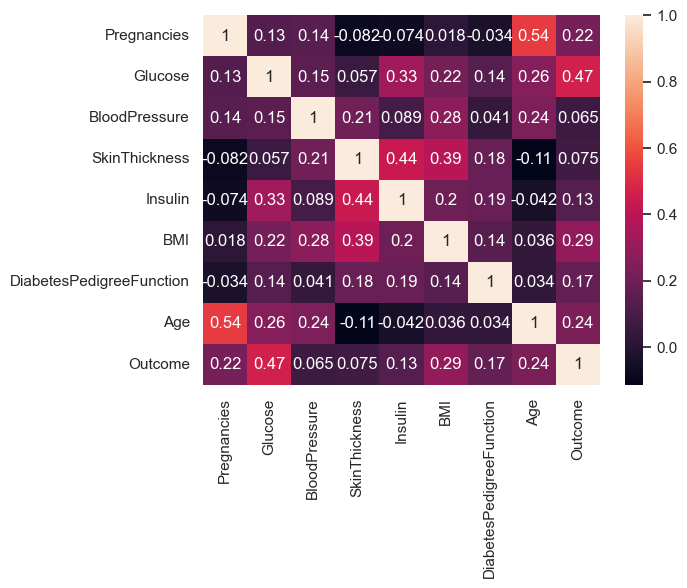

In [8]:
# Create a heat map with correlation data
sns.heatmap(data= corr, annot=True)

### EDA for positive outcome (Outcome=0)

In [9]:
# Data with Outcome=1
df_diabetes_positive= df_diabetes[df_diabetes['Outcome']==1]
df_diabetes_positive.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64              0        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1

In [24]:
df_diabetes_positive=df_diabetes_positive.drop(columns='Outcome')
df_diabetes_positive

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
2                       0.672   32  
4                       2.288   33  
6                       0.248   26  
8                       0.158   53  
..                        ...  ...  
755                     1.057   37  
757                     0.258   52  
759                     0.278   66  
761                     0.403   43  
766                     0.349   47  

[268 rows x 8 columns]

In [25]:
df_diabetes_positive.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  268.000000                268.000000  268.000000  
mean    35.142537                  0.550500   37.067164  
std      7.262967                  0.372354   10.968254  
min      0.000000                  0.088000   21.000000  
25%     30.800000                  0.262500   28.000000  
50%     34.250000                  0.449000   36.000000  
75%     38.775000                  0.728000   44.000000  
max     67.100000                  2.420000   70.000000

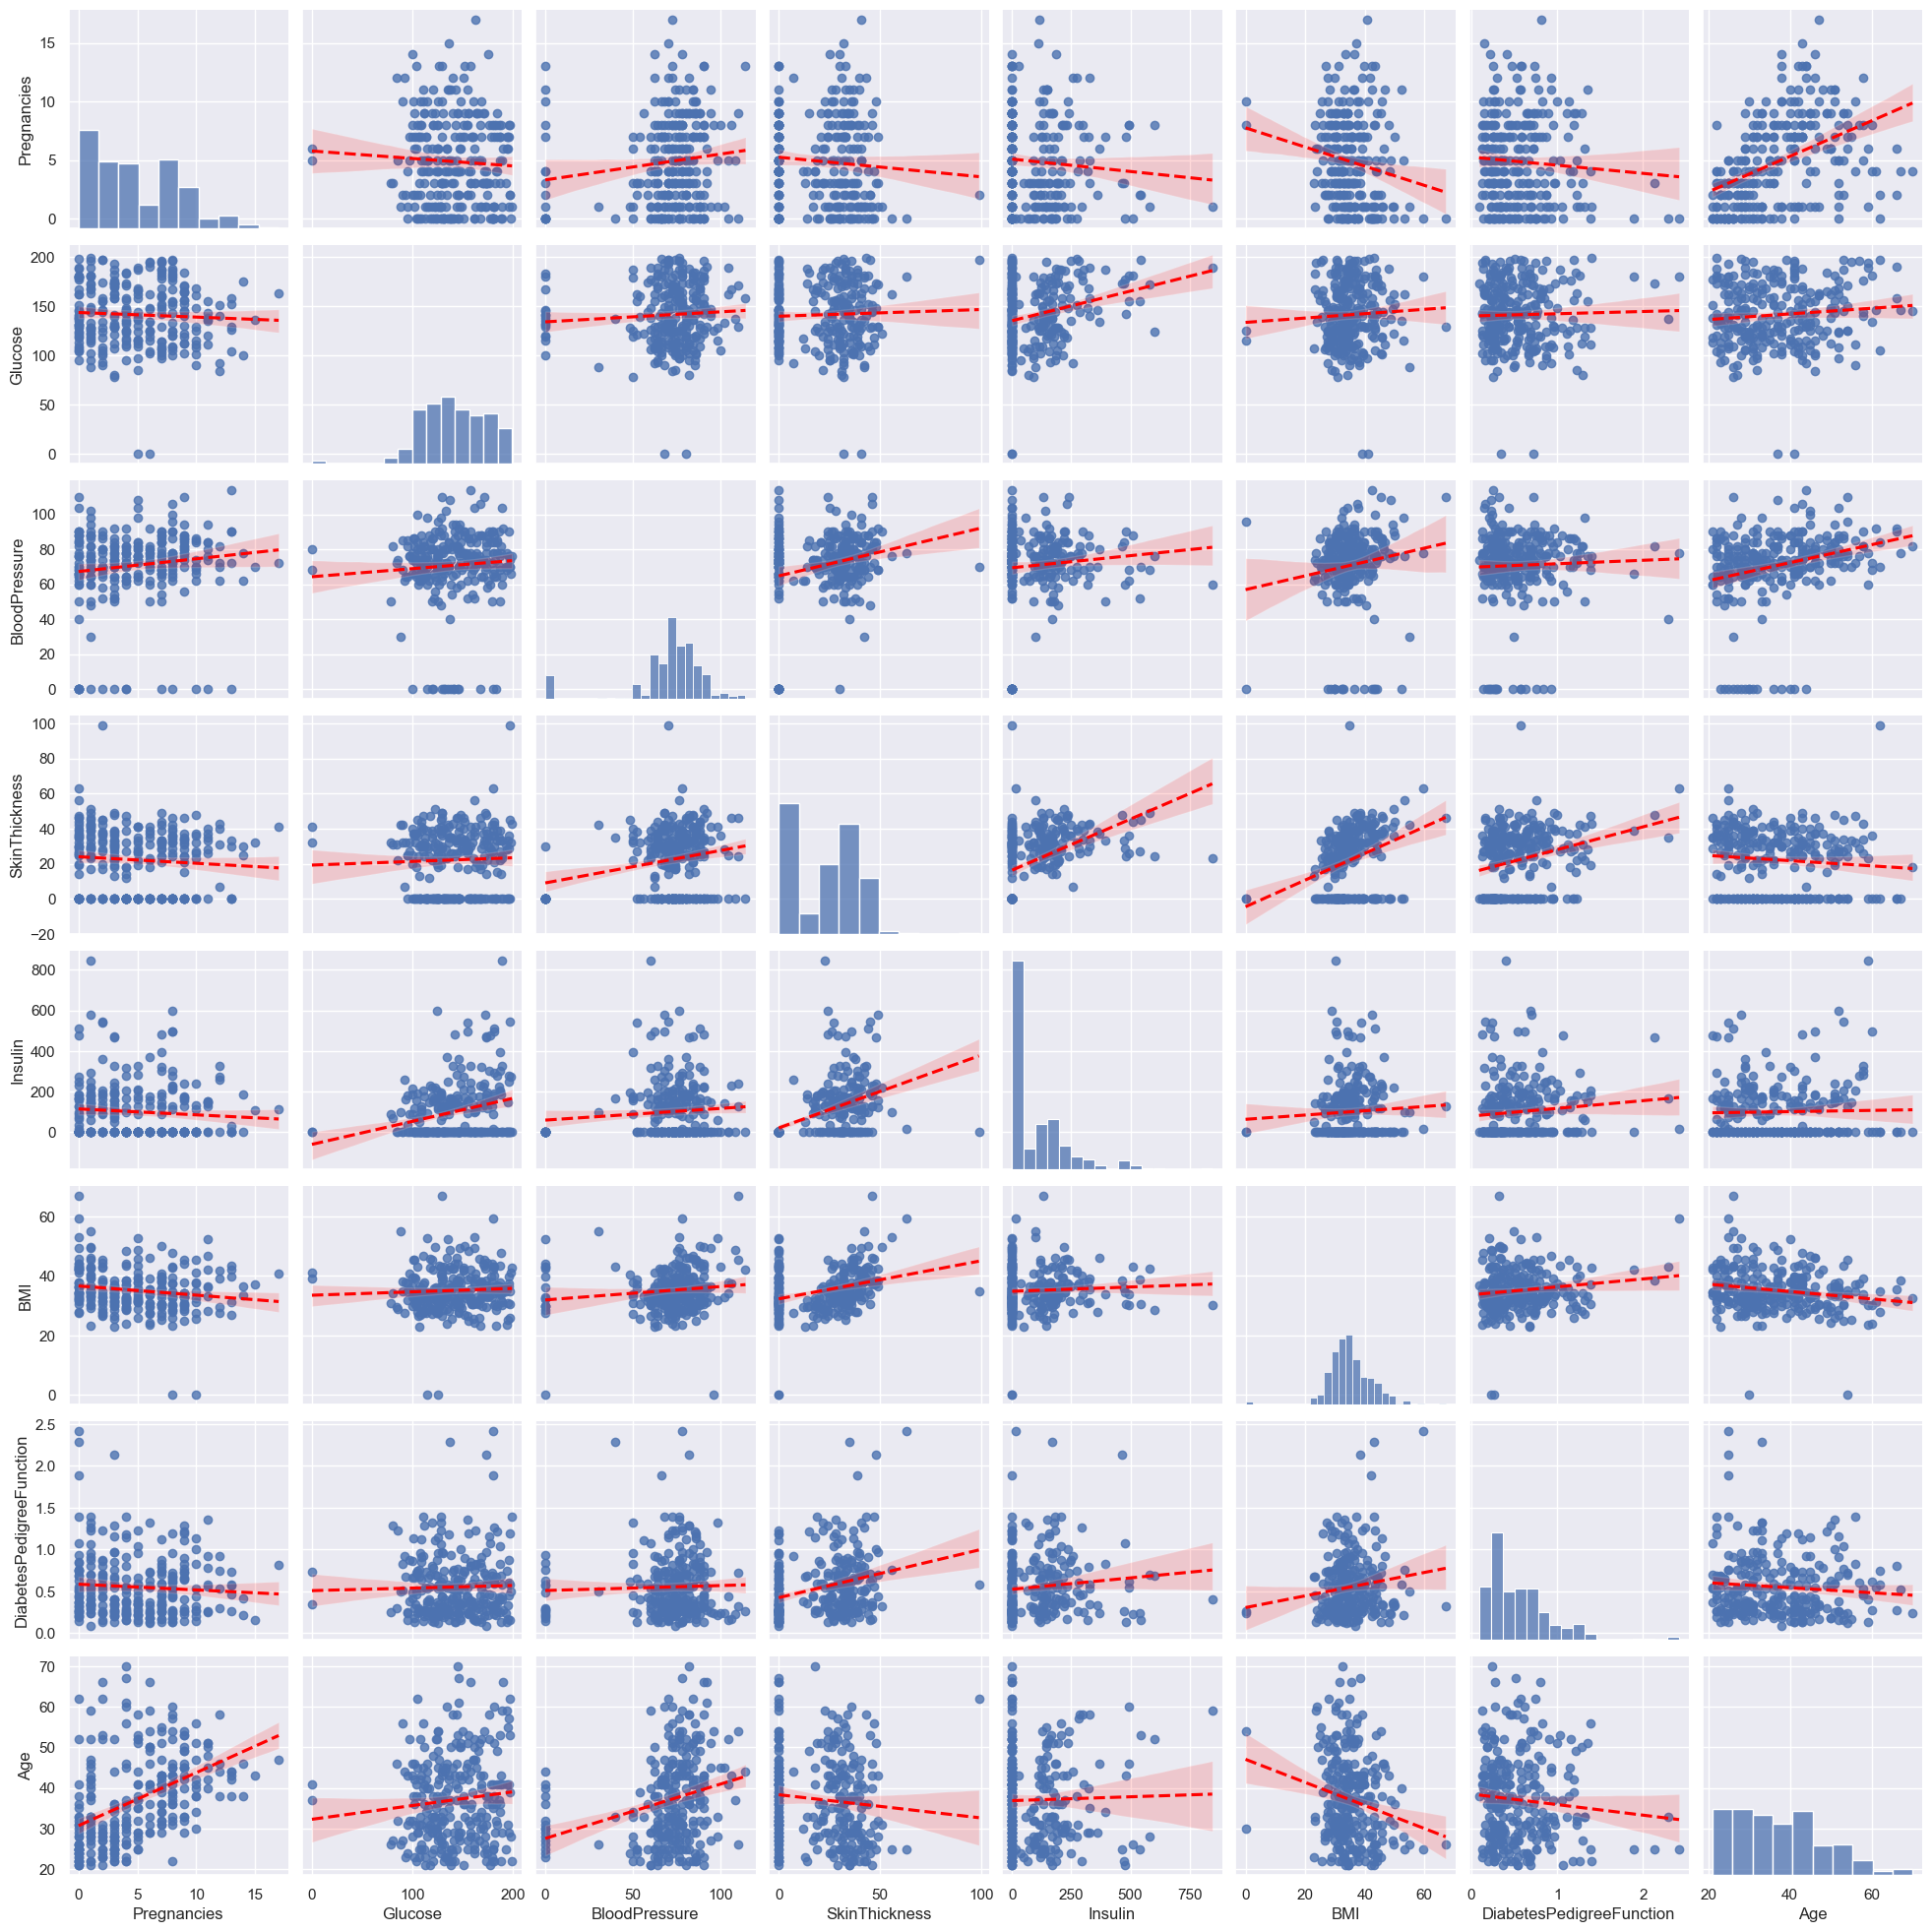

In [26]:
sns.set(style="darkgrid")
sns.pairplot(data=df_diabetes_positive,
            kind='reg',
            diag_kind='hist',
            plot_kws={'line_kws':{'color':'red', 'linestyle':'--'}})

In [27]:
corr_positive= df_diabetes_positive.corr()
corr_positive

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000 -0.054591       0.126963      -0.079165   
Glucose                     -0.054591  1.000000       0.068699       0.037618   
BloodPressure                0.126963  0.068699       1.000000       0.225247   
SkinThickness               -0.079165  0.037618       0.225247       1.000000   
Insulin                     -0.078563  0.261368       0.089367       0.456558   
BMI                         -0.159071  0.050418       0.133951       0.312058   
DiabetesPedigreeFunction    -0.069195  0.026474       0.034522       0.273900   
Age                          0.444987  0.098565       0.262684      -0.092012   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.078563 -0.159071                 -0.069195   
Glucose                   0.261368  0.050418                  0.026474   
BloodPressure             0.089367  0.133951                  0.034522   
SkinThickness             0.456558  0.312058                  0.273900   
Insulin                   1.000000  0.055112                  0.101565   
BMI                       0.055112  1.000000                  0.136761   
DiabetesPedigreeFunction  0.101565  0.136761                  1.000000   
Age                       0.023944 -0.188012                 -0.088119   

                               Age  
Pregnancies               0.444987  
Glucose                   0.098565  
BloodPressure             0.262684  
SkinThickness            -0.092012  
Insulin                   0.023944  
BMI                      -0.188012  
DiabetesPedigreeFunction -0.088119  
Age                       1.000000

<AxesSubplot:>

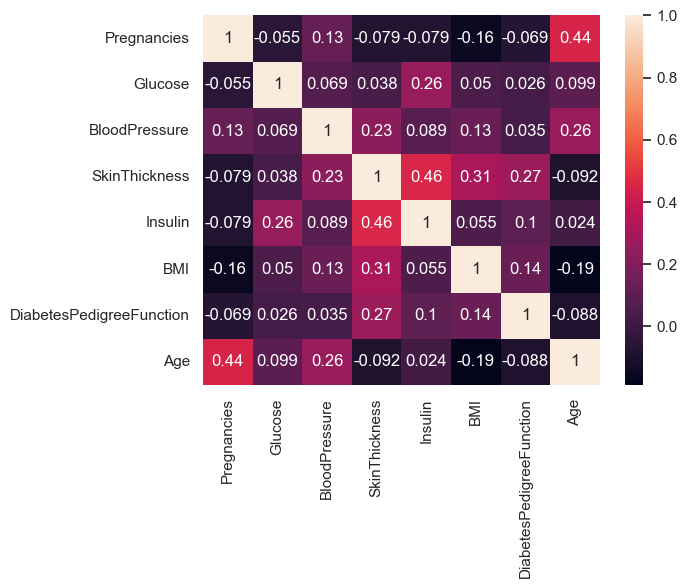

In [28]:
# Create a heat map with correlation data
sns.heatmap(data= corr_positive, annot=True)

### EDA for negative outcome ( Outcome=0)

In [14]:
# Data with Outcome=0
df_diabetes_negative= df_diabetes[df_diabetes['Outcome']==0]
df_diabetes_negative.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1       85             66             29        0  26.6   
3             1       89             66             23       94  28.1   
5             5      116             74              0        0  25.6   
7            10      115              0              0        0  35.3   
10            4      110             92              0        0  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
1                      0.351   31        0  
3                      0.167   21        0  
5                      0.201   30        0  
7                      0.134   29        0  
10                     0.191   30        0

In [15]:
df_diabetes_negative= df_diabetes_negative.drop(columns='Outcome')

In [31]:
df_diabetes_positive.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  268.000000                268.000000  268.000000  
mean    35.142537                  0.550500   37.067164  
std      7.262967                  0.372354   10.968254  
min      0.000000                  0.088000   21.000000  
25%     30.800000                  0.262500   28.000000  
50%     34.250000                  0.449000   36.000000  
75%     38.775000                  0.728000   44.000000  
max     67.100000                  2.420000   70.000000

In [16]:
df_diabetes_negative.describe()

Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  500.000000                500.000000  500.000000  
mean    30.304200                  0.429734   31.190000  
std      7.689855                  0.299085   11.667655  
min      0.000000                  0.078000   21.000000  
25%     25.400000                  0.229750   23.000000  
50%     30.050000                  0.336000   27.000000  
75%     35.300000                  0.561750   37.000000  
max     57.300000                  2.329000   81.000000

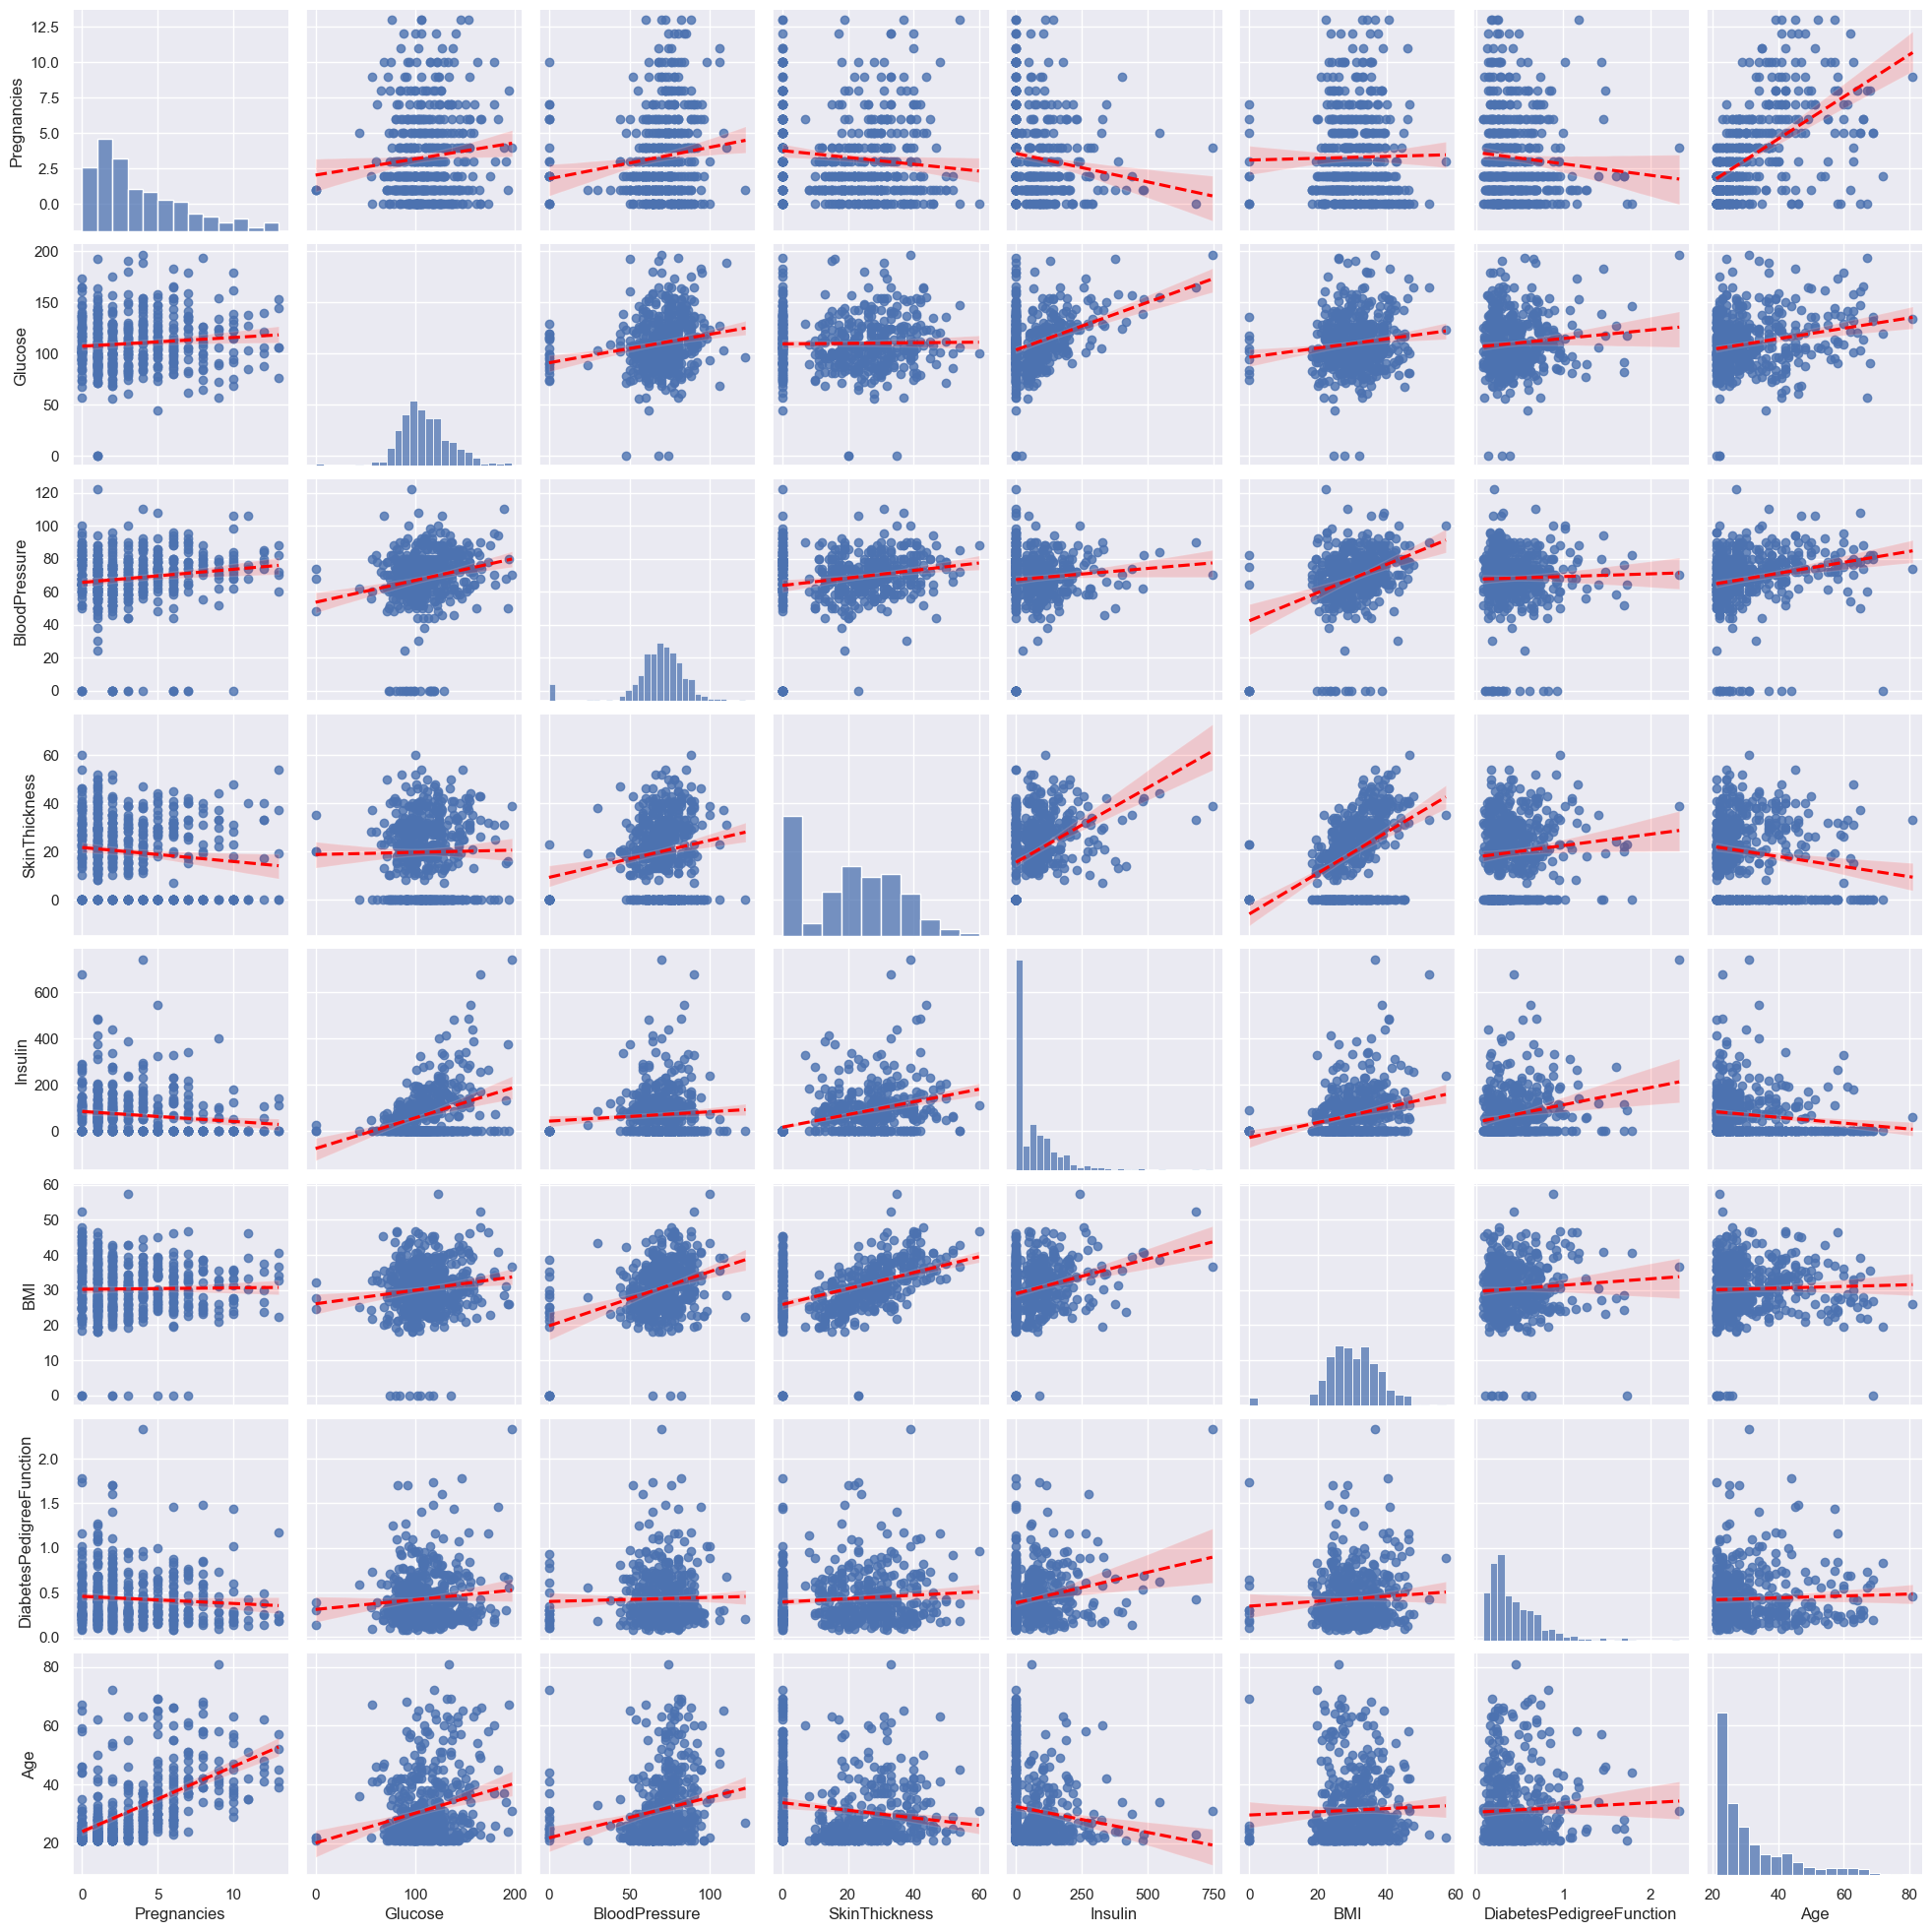

In [17]:
sns.set(style="darkgrid")
sns.pairplot(data=df_diabetes_negative,
            kind='reg',
            diag_kind='hist',
            plot_kws={'line_kws':{'color':'red', 'linestyle':'--'}})

In [29]:
corr_negative= df_diabetes_negative.corr()
corr_negative

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.098685       0.133096      -0.118340   
Glucose                      0.098685  1.000000       0.192795       0.016015   
BloodPressure                0.133096  0.192795       1.000000       0.187072   
SkinThickness               -0.118340  0.016015       0.187072       1.000000   
Insulin                     -0.131986  0.352957       0.074626       0.412790   
BMI                          0.016495  0.131749       0.363178       0.438606   
DiabetesPedigreeFunction    -0.079951  0.095548       0.027292       0.095181   
Age                          0.572776  0.228018       0.214694      -0.163788   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.131986  0.016495                 -0.079951   
Glucose                   0.352957  0.131749                  0.095548   
BloodPressure             0.074626  0.363178                  0.027292   
SkinThickness             0.412790  0.438606                  0.095181   
Insulin                   1.000000  0.254202                  0.227385   
BMI                       0.254202  1.000000                  0.070664   
DiabetesPedigreeFunction  0.227385  0.070664                  1.000000   
Age                      -0.149234  0.036070                  0.041665   

                               Age  
Pregnancies               0.572776  
Glucose                   0.228018  
BloodPressure             0.214694  
SkinThickness            -0.163788  
Insulin                  -0.149234  
BMI                       0.036070  
DiabetesPedigreeFunction  0.041665  
Age                       1.000000

<AxesSubplot:>

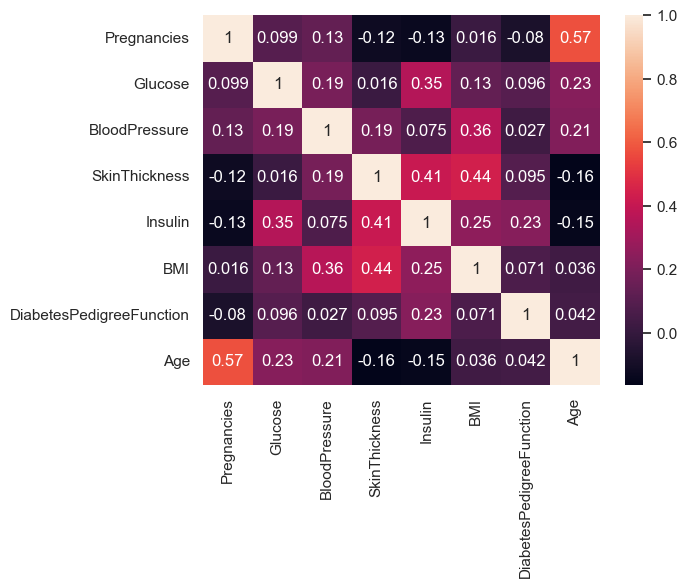

In [30]:
# Create a heat map with correlation data
sns.heatmap(data= corr_negative, annot=True)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [18]:
for column_name in df_diabetes.columns:
    count = (df_diabetes[column_name] == 0).sum()
    print('Num zeros in column', column_name, 'is:', count)

Num zeros in column Pregnancies is: 111
Num zeros in column Glucose is: 5
Num zeros in column BloodPressure is: 35
Num zeros in column SkinThickness is: 227
Num zeros in column Insulin is: 374
Num zeros in column BMI is: 11
Num zeros in column DiabetesPedigreeFunction is: 0
Num zeros in column Age is: 0
Num zeros in column Outcome is: 500


In [19]:
# SkinThickness=0 in with positive and negative population
print(df_diabetes[df_diabetes.SkinThickness == 0].groupby('Outcome')['Outcome'].count())

Outcome
0    139
1     88
Name: Outcome, dtype: int64


In [20]:
# Insulin=0 in with positive and negative population
print(df_diabetes[df_diabetes.Insulin == 0].groupby('Outcome')['Outcome'].count())

Outcome
0    236
1    138
Name: Outcome, dtype: int64


#### Invalid data
- [Outcome] =0 is the label --> keep data with 0
- [Pregnancies, DiabetesPedigreeFunction, Age] is logical with value of 0 --> keep data with 0
- [SkinThickness, Insulin]=0 might not make logical sense, however the population of data with 0 is large (227,374)--> further exloratory.      
    - Majority with [SkinThickness, Insulin]=0 are in negative population [Outcome]=0 --> assume that feature mean increase in SkinThickness and Insulin observe in population --> keep the data
- [Glucose, Blood pressure, BMI] with data point=0 are invalid data, since small population has invalid data in these features--> drop [Glucose, Blood pressure, BMI] = 0


In [21]:
import numpy as np
# Replace [Glucose,BloodPressure,BMI]=0 with NA
invalid_data_col = ['Glucose', 'BloodPressure', 'BMI'] # cols with inappropriate 0s
df_diabetes[invalid_data_col] = df_diabetes[invalid_data_col].replace(0, np.NaN)
# Double check
df_diabetes[invalid_data_col].isnull().sum()

Glucose           5
BloodPressure    35
BMI              11
dtype: int64

In [22]:
# Drop [Glucose,BloodPressure,BMI]=0
df_diabetes_mod= df_diabetes.dropna()

In [23]:
# Save data for ML model and training
# df_diabetes_mod.to_csv(r'/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Supervised_MLProject/data/df_diabetes_mod.csv', index= False)